# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# define the ECDF per DataCamp
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1,len(x)+1)/len(x)
    return x, y

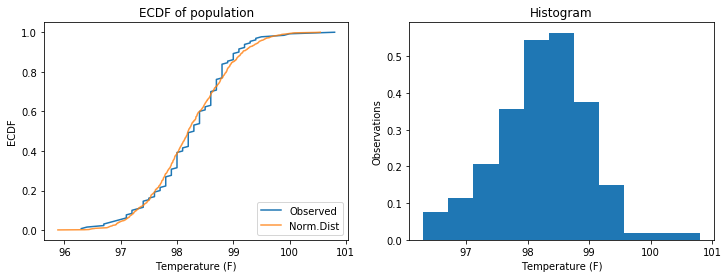

In [3]:
# Graphically inspect the whole population
mean = np.mean(df['temperature'])
std = np.std(df['temperature'])
samples = np.random.normal(mean, std, size=1000)

x_pop, y_pop = ecdf(df['temperature'])
x_norm, y_norm = ecdf(samples)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
_ = plt.title('ECDF of population')
_ = plt.plot(x_pop, y_pop, linestyle='-', label='Observed')
_ = plt.plot(x_norm, y_norm, linestyle='-', alpha=0.8, label='Norm.Dist')
_ = plt.legend(loc='lower right')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('ECDF')
plt.subplot(1,2,2)
_ = plt.title('Histogram')
_ = plt.hist(df['temperature'], bins=int(len(df['temperature'])**0.5), density=True)
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Observations')
plt.show()

In [4]:
from scipy.stats import shapiro

# normality test with Shapiro, good for datasets <1,000
stat, p = shapiro(df['temperature'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# inspired by: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

Statistics=0.987, p=0.233


# Answer 1:

A graphical inspection casts some doubt. The histogram shows a light right tail, and the ECDF shows some deviation around 99F.  

However, the Shapiro-Wilks test returns a p-value of 0.23, well above the typical null hypothesis rejection threshold of 0.05.  
Therefore, we **accept the null hypothesis: the dataset is normal**.

In [5]:
print(len(df))

130


# Answer 2:

The dataset contains 130 observations. This paper regarding normality: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3693611/ considers a sample size of 30 to 40 "large enough".

Yes, according to the source paper of this data set, the data came from seperate individuals and the observations can therefore be considered independent.

observed mean=98.25
p_value=0.00
Reject the 0H: the true pop mean is not 98.6


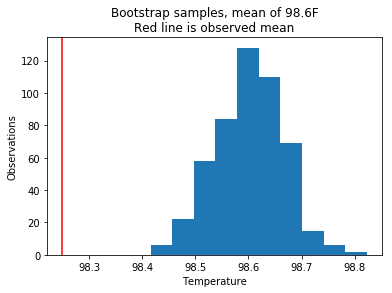

In [6]:
#
# (I) bootstrap test - 0H: population mean is 98.6F
#
print('observed mean=%.2f' % mean)

# Step one: shift the observations to a mean of 98.6F:
df['shifted_temperature'] = df['temperature'] - mean + 98.6

# Step two: take bootstrap samples of len(df)
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

bs_repl = draw_bs_reps(df['shifted_temperature'], np.mean, 500)

# Step three: calculate and interpret p-value
p_value = sum(bs_repl < mean)/len(bs_repl)
print('p_value=%.2f' % p_value)
if p_value < 0.05:
    print('Reject the 0H: the true pop mean is not 98.6')
else:
    print('Accept the 0H: the true pop mean is 98.6')

# Step four: d
plt.hist(bs_repl)
plt.title('Bootstrap samples, mean of 98.6F\nRed line is observed mean')
plt.xlabel('Temperature')
plt.ylabel('Observations')
plt.axvline(x=mean, color='r')
plt.show()

In [7]:
import scipy
from statsmodels.stats.weightstats import ztest

#
# (II) Frequentist testing
#

# We will use a One-Sample t-test. 
# The one-sample are the original observations, and the "known mean" is the hypothesized 98.6F.

t, p_1sttest = scipy.stats.ttest_1samp(df['temperature'], 98.6)
z, p_zstat = ztest(x1=df['temperature'], value=98.6)

print('p of 1 sample t-test=%.2f' % p_1sttest)
print('p of 1 sample z-test=%.2f' % p_zstat)

p of 1 sample t-test=0.00
p of 1 sample z-test=0.00


# Answer 3:

## 3.1: Bootstrap Replicates Conclusion
The p-value of 0.00 is smaller than the typical threshold of 0.05, so we **reject the null hypothesis**.
Therefore, no, it is highly unlikely that the true population mean is 98.6F.  

## 3.2: Frequentist testing
* We use a **one-sample test**, because we are to compare one known sample (original temperature) to a hypothesized population mean of 98.6.
* The **z-test is more appropriate** because the sample size is large (>30).

Both tests return a p-value of 0.00 < 0.05. Therefore, in both cases **we reject the 0H**: the true population mean is not 98.6F.

In [8]:
# take a random sample of 10 and perform the t-test:
np.random.seed(100)
sample_of_10 = np.random.choice(df['temperature'], 10)

t_small, p_1sttest_small = scipy.stats.ttest_1samp(sample_of_10, 98.6)

print('p_value=%.2f' % p_1sttest_small)
if p_1sttest_small < 0.05:
    print('Reject the 0H: the true pop mean is not 98.6')
else:
    print('Accept the 0H: the true pop mean is 98.6')

p_value=0.10
Accept the 0H: the true pop mean is 98.6


# Answer 4:

When using a smaller sample size of 10, a t-test is more appropriate.

For the small sample, the test yields a p > 0.05. Therefore we accept the 0H, the true population mean is 98.6.  
For this small sample, it is difficult to infer the standard deviation. Our observed mean could more plausibly be an outlier.

Also, the p-value varies heavily when re-sampling. To produce consistent results, we seed the RNG.

In [9]:
# Calculate the 95% confidence interval of the observed data using bootstrap replicates:
bs_repl_obs = draw_bs_reps(df['temperature'], np.mean, 1000)
conf_int_observed = np.percentile(bs_repl_obs, [2.5, 97.5])
print('95% Confidence interval of observed data (bootstrap):', conf_int_observed)

# Calculate the 95% confidence interval of the idealized distribution (frequentist approach)
conf_int_ideal = np.percentile(samples, [2.5, 97.5])
print('95% Confidence interval of idealized distribution (frequentist):', conf_int_ideal)

# Margin of error using: Critical Value (z-stat) * Std Deviation
MoE_observed = ztest(x1=bs_repl_obs, value=np.mean(bs_repl_obs))[0] * np.std(bs_repl_obs)
MoE_idealized = ztest(x1=samples, value=mean)[0] * std
print('Margin of Error using bootstrap: %.3f\nMargin of Error using frequentist appr.: %.3f' % (MoE_observed, MoE_idealized))

95% Confidence interval of observed data (bootstrap): [98.12459615 98.37848077]
95% Confidence interval of idealized distribution (frequentist): [96.90424009 99.65604937]
Margin of Error using bootstrap: 0.000
Margin of Error using frequentist appr.: -0.420


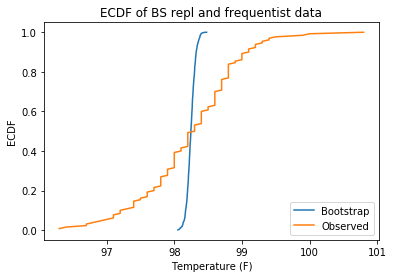

In [10]:
x_bs, y_bs = ecdf(bs_repl_obs)

_ = plt.title('ECDF of BS repl and frequentist data')
_ = plt.plot(x_bs, y_bs, label='Bootstrap')
_ = plt.plot(x_pop, y_pop, linestyle='-', label='Observed')
_ = plt.legend(loc='lower right')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('ECDF')
plt.show()

In [11]:
print(np.std(df['shifted_temperature']))
print(np.std(df['temperature']))
print(np.std(bs_repl))

0.730357778905038
0.7303577789050377
0.06411998361060924


# Answer 5

An observed temperature is 'abnormal' when it is lower than 96.9 F or higher than 99.7 F.

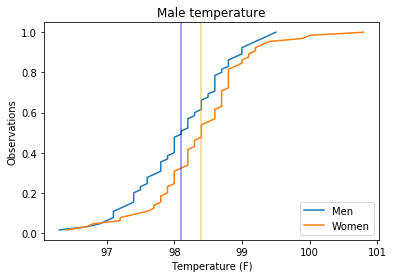

Male mean temperature: 98.10 and sample size: 65
Female mean temperature: 98.39 and sample size: 65


In [12]:
# Graphically inspect the population broken out by gender

men_temp = df[df['gender'] == 'M']['temperature']
women_temp = df[df['gender'] == 'F']['temperature']

men_std = np.std(men_temp)
men_mean = np.mean(men_temp)
women_std = np.std(women_temp)
women_mean = np.mean(women_temp)

x_men, y_men = ecdf(men_temp)
x_women, y_women = ecdf(women_temp)

plt.figure(figsize=(6,4))
_ = plt.plot(x_men, y_men, linestyle='-', label='Men')
_ = plt.plot(x_women, y_women, linestyle='-', label='Women')
_ = plt.title('Male temperature')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Observations')
_ = plt.legend(loc='lower right')
_ = plt.axvline(x=men_mean, color='b', alpha=0.5)
_ = plt.axvline(x=women_mean, color='orange', alpha=0.5)

plt.show()

print(('Male mean temperature: %.2f and sample size: %.0f') % (men_mean, len(men_temp)))
print(('Female mean temperature: %.2f and sample size: %.0f') % (women_mean, len(women_temp)))

The observed means appear quite close, so a statistical test is needed.  

We will proceed with a two-sample t-test, which is often used to compare mean values of normal distribution.

In [13]:
tstat_MF, p_val_MF = scipy.stats.ttest_ind(men_temp, women_temp, equal_var=False)

print('the p-value is %.2f' % p_val_MF)

the p-value is 0.02


# Answer 6

Yes, there is a statistically significant difference in male body temperature compared to female body temperature: the male body temperature is lower.